<a href="https://colab.research.google.com/github/fabicorvelo/AdivinhaAPalavra/blob/main/7_Aula_Arvore_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão

### Importação das Bibliotecas

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carregando a base de dados iris

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/dataset/iris.csv')

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Separando os valores de dados e classes

In [ ]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

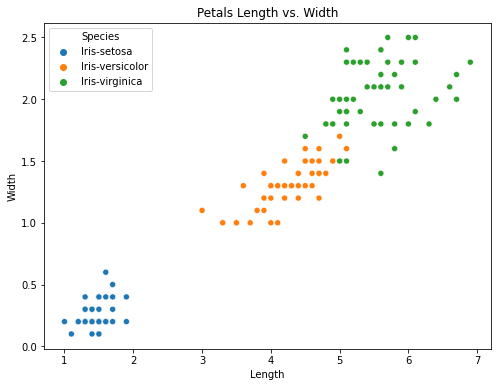

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = iris, x = 'PetalLength', y = 'PetalWidth', hue = 'Species')
plt.title('Petals Length vs. Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

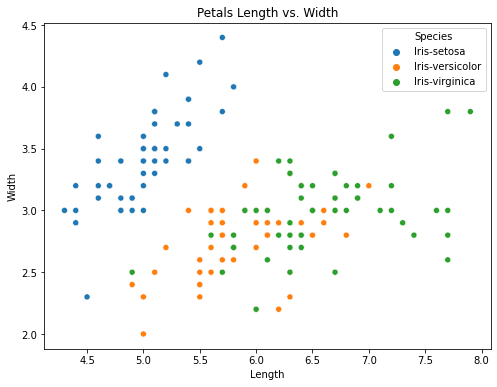

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = iris, x = 'SepalLength', y = 'SepalWidth', hue = 'Species')
plt.title('Sepale Length vs. Width')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

## Convertendo valores categórios de classe em numéricos

In [ ]:
def converte_classe(l):
    if l == 'Iris-setosa':
        return 0
    elif l == 'Iris-versicolor':
        return 1
    elif l == 'Iris-virginica':
        return 2

In [ ]:
y = y.apply(converte_classe)

In [ ]:
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
# Dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
X_train.shape,X_test.shape

((105, 4), (45, 4))

In [ ]:
y_train.shape,y_test.shape

((105,), (45,))

In [ ]:
# Instânciando o objeto classificador
clf = tree.DecisionTreeClassifier()

#### Parâmetros do  classificador DecisionTreeClassifier
* criterion: medida de qualidade da divisão
* splitter: estratégia utilizada para dividir o nó de decisão
* max_depth: profundidade máxima da árvore
* min_samples_split: número de amostras mínimas para considerar um nó para divisão
* min_samples_leaf: número de amostras mínimas no nível folha

In [ ]:
# Treinando o modelo de arvore de decisão
clf = clf.fit(X_train,y_train)

In [ ]:
# Verificando as features mais importantes para o modelo de arvore de decisão treinado
clf.feature_importances_

array([0.        , 0.04300928, 0.40406279, 0.55292793])

In [ ]:
iris_1 = load_iris()

In [ ]:
for feature,importancia in zip(iris_1.feature_names,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

sepal length (cm):0.0
sepal width (cm):0.043009284543965055
petal length (cm):0.4040627854898855
petal width (cm):0.5529279299661496


In [ ]:
# Executando o algoritmo de arvore de decisão com o conjunto de teste
resultado = clf.predict(X_test)
resultado

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
X_test

,SepalLength,SepalWidth,PetalLength,PetalWidth
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3


In [ ]:
#Testando com uma nova amostra
test = np.array([[5.1,3.5,1.4,0.2]])
r1 = clf.predict(test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
def converte_classe(l):
    if l == 0:
        return 'Iris-setosa'
    elif l == 1:
        return 'Iris-versicolor'
    elif l == 2:
        return 'Iris-virginica'

In [ ]:
r1

array([0])

In [ ]:
converte_classe(r1)

'Iris-setosa'

In [ ]:
iris.tail()

In [ ]:
#Testando com uma nova amostra
test = np.array([[6.8,3.5,5.4,2.2]])
r1 = clf.predict(test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
converte_classe(r1)

'Iris-virginica'

In [ ]:
#Métricas de Validação
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=iris_1.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        18
   virginica       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
#Biblioteca para utilização de widgets interativos
#!pip install ipywidgets

In [ ]:
#Bibliotecas para visualização da arvore de recisão
#!pip3 install pydot

In [ ]:
#!pip3 install graphviz

In [ ]:
import matplotlib.pyplot as plt # visualization

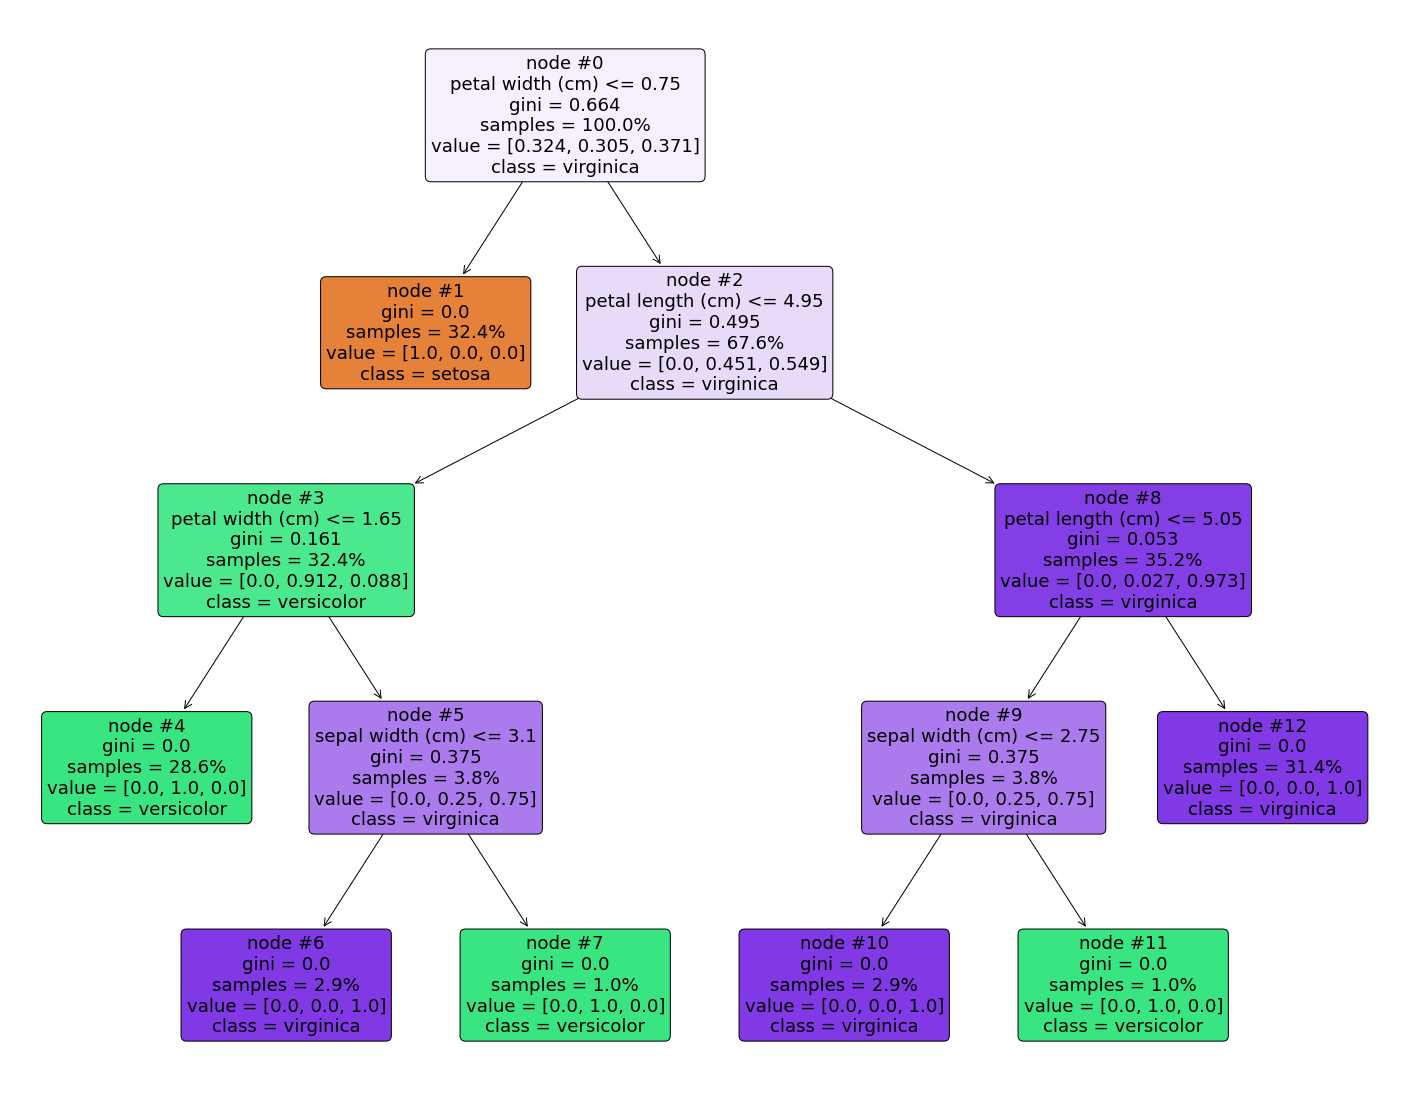

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris_1.feature_names,
                   class_names=iris_1.target_names,node_ids=True,
                   filled=True, rounded=True, proportion=True, label='all')

In [ ]:
#Salvando a Figura
fig.savefig("decistion_tree.png")